In [1]:
from schrutepy import schrutepy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import nltk
from nltk.corpus import stopwords
from PIL import Image
import numpy as np
import collections
import pandas as pd

Load the entire transcript with the load_schrute function

In [2]:
df = schrutepy.load_schrute()

Inspect the data

In [3]:
df.head()

index  season  episode episode_name    director  \
0      1       1        1        Pilot  Ken Kwapis   
1      2       1        1        Pilot  Ken Kwapis   
2      3       1        1        Pilot  Ken Kwapis   
3      4       1        1        Pilot  Ken Kwapis   
4      5       1        1        Pilot  Ken Kwapis   

                                        writer character  \
0  Ricky Gervais;Stephen Merchant;Greg Daniels   Michael   
1  Ricky Gervais;Stephen Merchant;Greg Daniels       Jim   
2  Ricky Gervais;Stephen Merchant;Greg Daniels   Michael   
3  Ricky Gervais;Stephen Merchant;Greg Daniels       Jim   
4  Ricky Gervais;Stephen Merchant;Greg Daniels   Michael   

                                                text  \
0  All right Jim. Your quarterlies look very good...   
1         Oh, I told you. I couldn't close it. So...   
2  So you've come to the master for guidance? Is ...   
3         Actually, you called me in here, but yeah.   
4    All right. Well, let me show you how it's done.   

                                    text_w_direction  
0  All right Jim. Your quarterlies look very good...  
1         Oh, I told you. I couldn't close it. So...  
2  So you've come to the master for guidance? Is ...  
3         Actually, you called me in here, but yeah.  
4    All right. Well, let me show you how it's done.

Some of the records don't contain dialogue

In [4]:
df = df.dropna()

Create a wordcloud of all the text in the entire series

In [5]:
text = " ".join(review for review in df.text)

In [6]:
print ("There are {} words in the combination of all review.".format(len(text)))

There are 3001517 words in the combination of all review.


[nltk_data] Downloading package stopwords to /home/xps/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


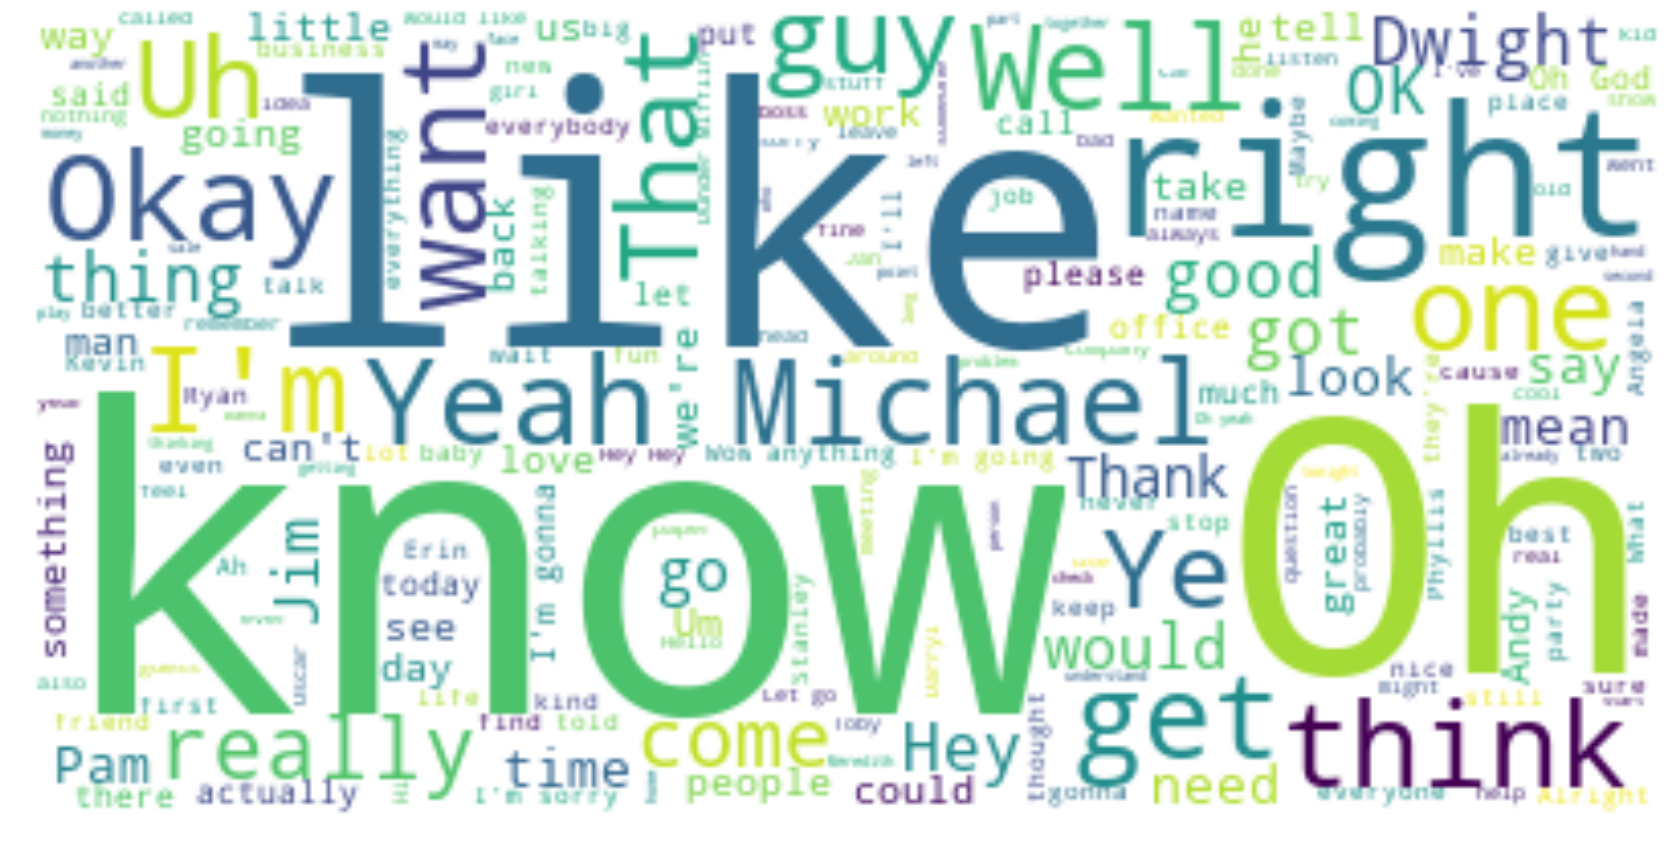

In [9]:
# Create stopword list:
nltk.download('stopwords')
stopWords = set(stopwords.words('english'))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopWords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[30,15])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Let's do this same thing for a few of the characters. Might as well make a function at this point...

In [11]:
def plotDunder(character, df):
    mydf = df[df.character == character]
    text1 = " ".join(review for review in mydf.text)
    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopWords, background_color="white").generate(text1)

    # Display the generated image:
    # the matplotlib way:
    plt.figure(figsize=[15,7])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(character)
    plt.axis("off")
    plt.show()
    

In [28]:
fav = ["Michael", "David Wallace", "Dwight", "Jim", "Pam", "Oscar", "Phyllis", "Creed", "Ryan",]

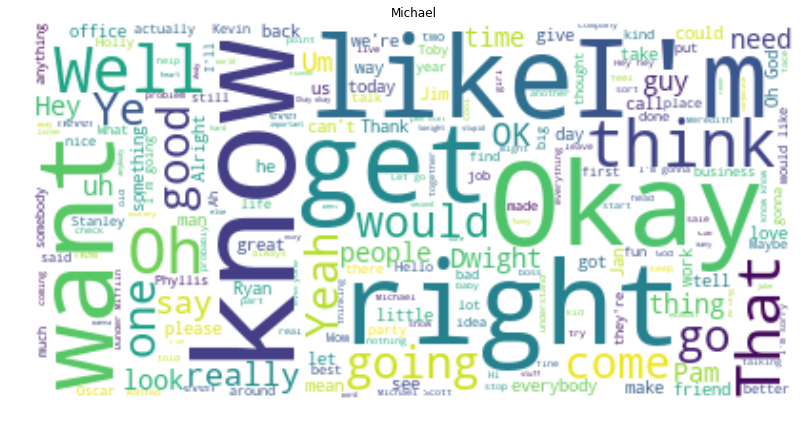

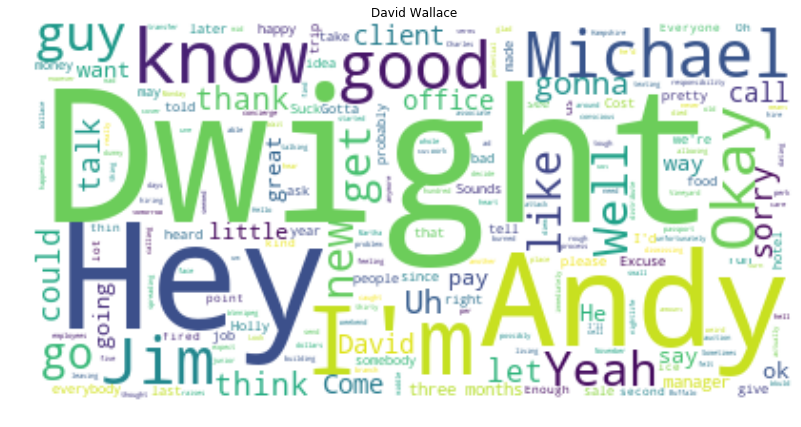

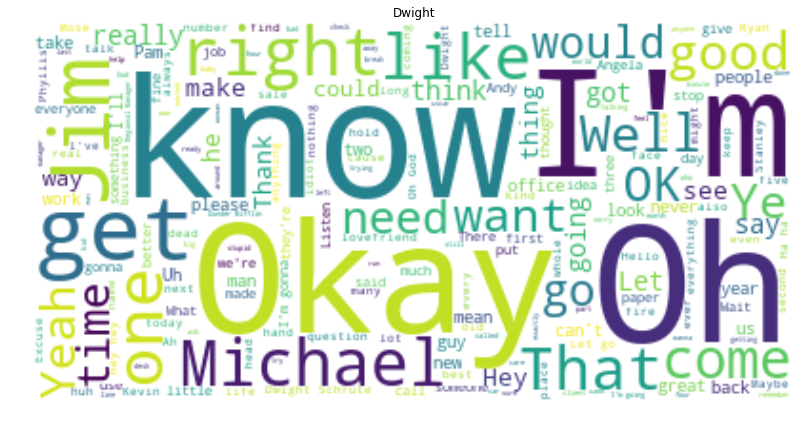

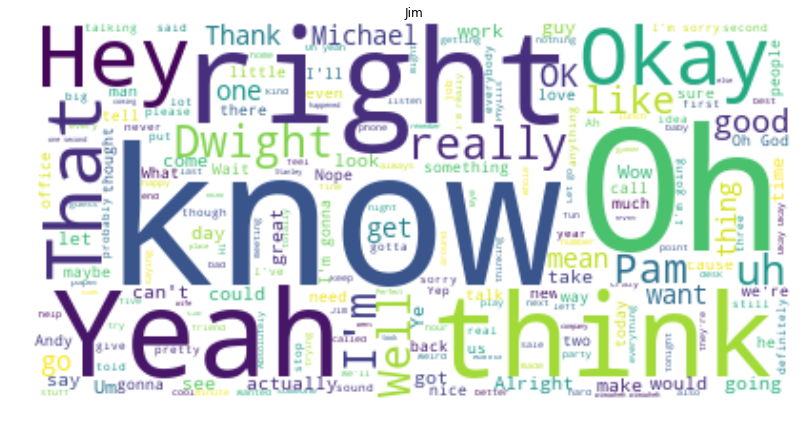

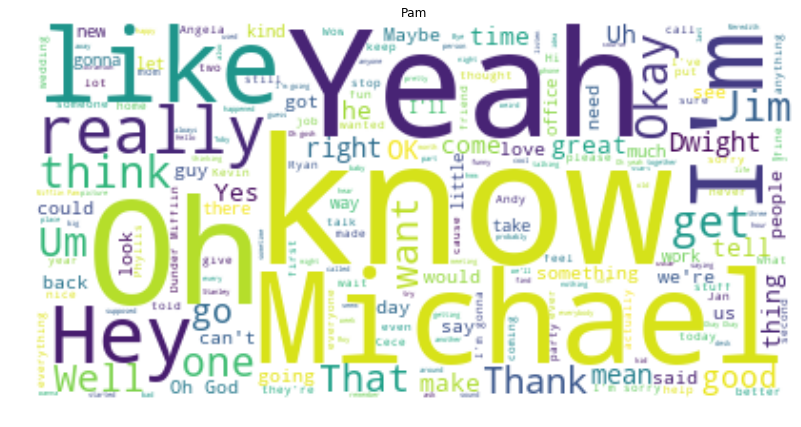

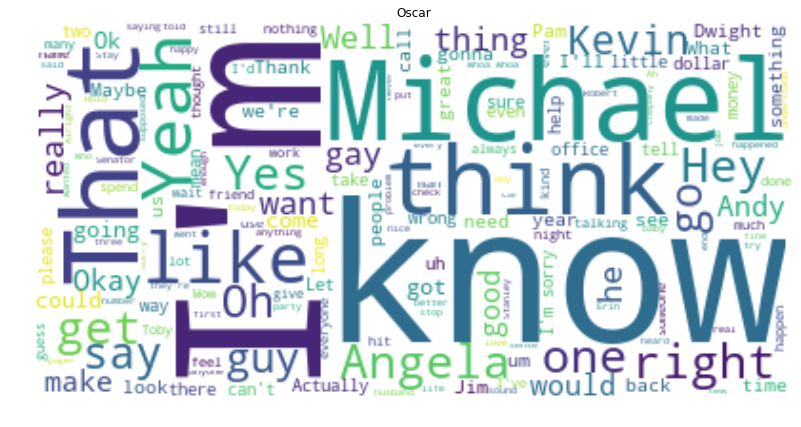

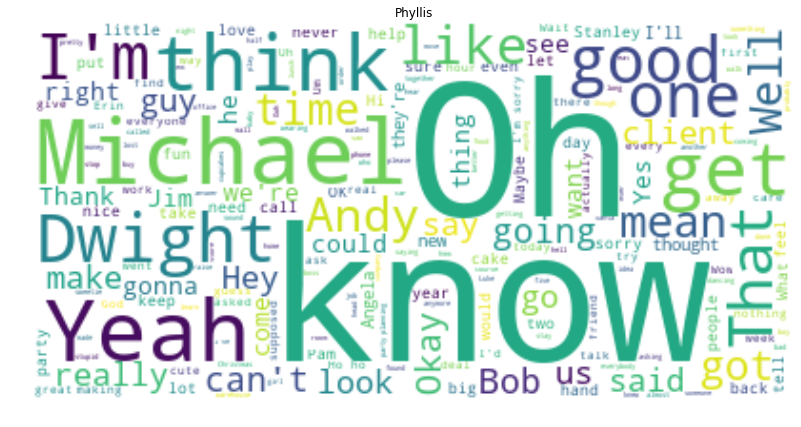

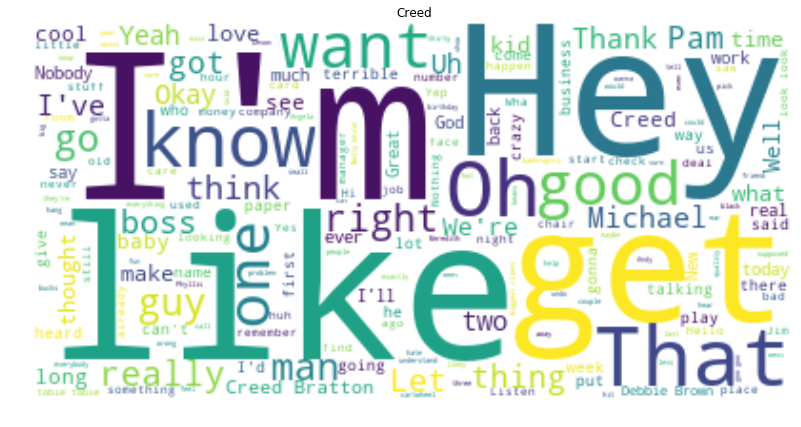

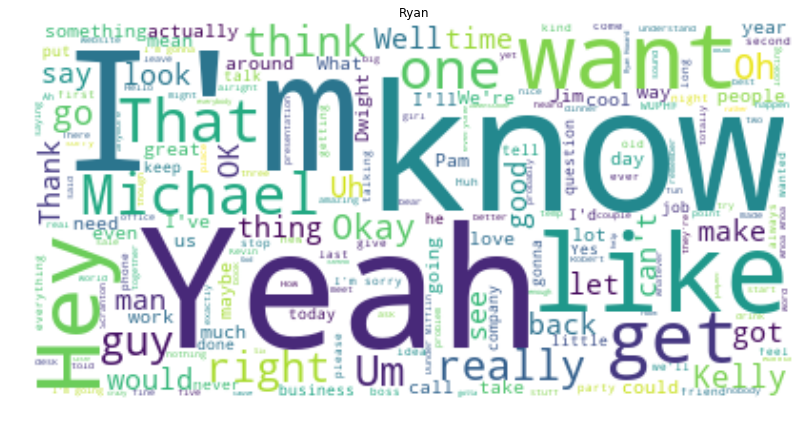

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [14]:
for i in fav:
    plotDunder(i, df)

Let's make on in the shape of Dwight's large head

In [15]:
dwight_mask = np.array(Image.open("schrutepy.png"))

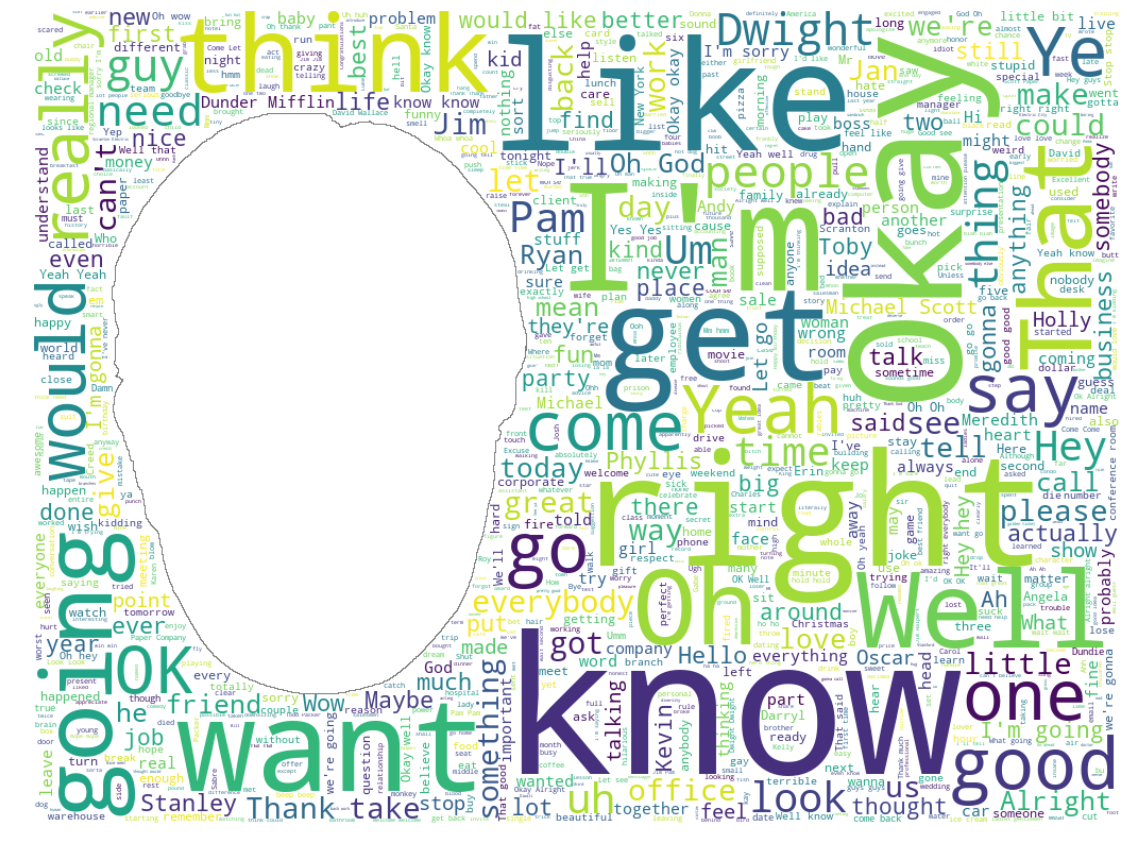

In [30]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=dwight_mask,
               stopwords=stopWords, contour_width=1, contour_color='grey')

# Generate a wordcloud
wc.generate(text)


# show
plt.figure(figsize=[30,15])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


wc.to_file("final_schrute.png")

Now let's find and plot the most common word spoken by my favorite characters

In [26]:
def commonWord(character, df):
    mydf = df[df.character == character]
    text = " ".join(review for review in mydf.text)
    wordcount = {}
    # To eliminate duplicates, remember to split by punctuation, and use case demiliters.
    for word in text.lower().split():
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace(":","")
        word = word.replace("\"","")
        word = word.replace("!","")
        word = word.replace("â€œ","")
        word = word.replace("â€˜","")
        word = word.replace("*","")
        if word not in stopWords:
            if word not in wordcount:
                wordcount[word] = 1
            else:
                wordcount[word] += 1

    # Print most common word
    n_print = int(10)
#     print("\nOK. The {} most common words are as follows\n".format(n_print))
    word_counter = collections.Counter(wordcount)
    for word, count in word_counter.most_common(n_print):
        pass
    # Close the file
    # Draw a bar chart
    lst = word_counter.most_common(n_print)
    df = pd.DataFrame(lst, columns = ['Word', 'Count'])
    df.plot.bar(x='Word',y='Count', title=character)

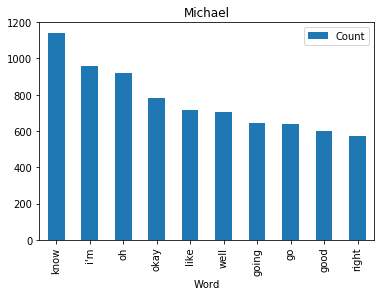

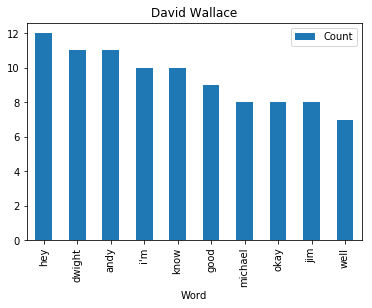

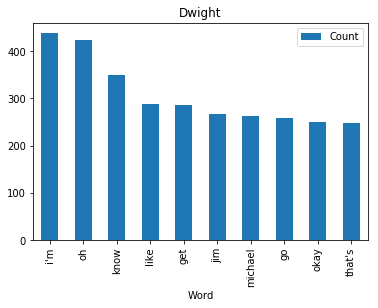

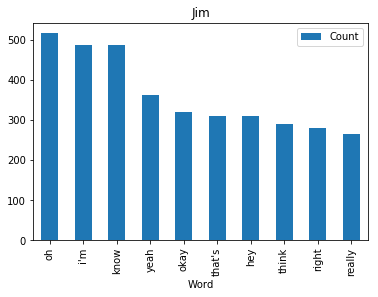

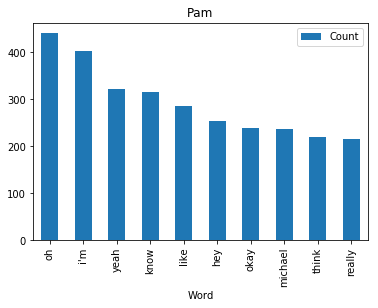

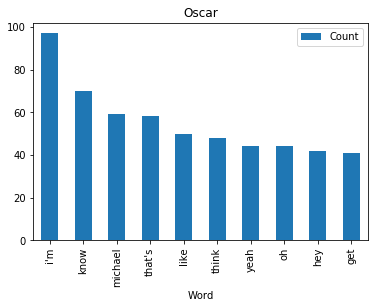

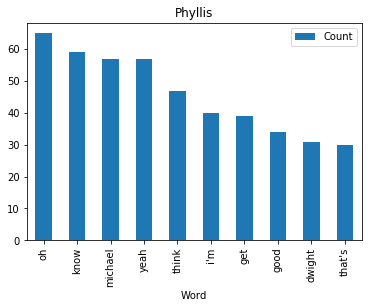

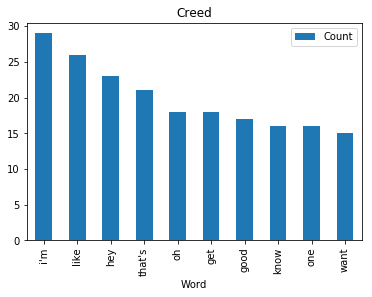

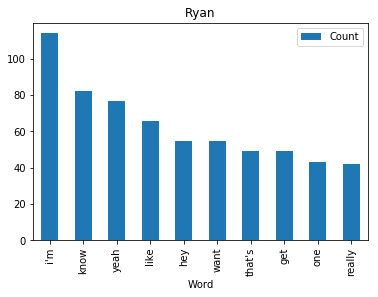

In [29]:
for i in fav:
    commonWord(i, df)